<a href="https://colab.research.google.com/github/KevinAkat/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/%20module1-exploratory-data-analysis/Kevin_Akat_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

### 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

### A) Importing the Pandas and Numpy Because It Makes Sense to Just Do This Upfront

In [0]:
import pandas as pd
import numpy as np

### B) Loading the Dataset from UCI (via URL) and Saving the Dataset to a Dataframe.



In [0]:
# Loading the dataset from UCI (via URL)

wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Saving the dataset to a Dataframe

df = pd.read_csv(wine_url)


### C) Exploring the Data (Head, Tail, Column Headers, Missing Values)



In [58]:
# Checking the first 5 rows of the Dataframe

print(df.head(5))

# Checking the bottom 5 rows of the Dataframe

print(df.tail(5))

# The first and last 5 rows appear to be just fine, but Google Collab has 
# interpreted the row of data as the column headers since the column headers 
# were not specifically included as the top row in the dataset. 

# Therefore, I will add in my own column headers manually and save them 
# as a list to a varable called "column_headers":

column_headers = ['Wine Classification Number',
                  'Alcohol','Malic Acid','Ash','Alcalanity of Ash','Magnesium',
                  'Total Phenols','Flavanoids','Nondlavanoid Phenols',
                  'Proanthocyanins','Color Intensity',
                  'Hue','OD280/OD315 of Diluted Wines','Proline']



   Alcohol  Malic Acid   Ash  ...   Hue  OD280/OD315 of Diluted Wines  Proline
1    14.23        1.71  2.43  ...  1.04                          3.92     1065
1    13.20        1.78  2.14  ...  1.05                          3.40     1050
1    13.16        2.36  2.67  ...  1.03                          3.17     1185
1    14.37        1.95  2.50  ...  0.86                          3.45     1480
1    13.24        2.59  2.87  ...  1.04                          2.93      735

[5 rows x 13 columns]
   Alcohol  Malic Acid   Ash  ...   Hue  OD280/OD315 of Diluted Wines  Proline
3    13.71        5.65  2.45  ...  0.64                          1.74      740
3    13.40        3.91  2.48  ...  0.70                          1.56      750
3    13.27        4.28  2.26  ...  0.59                          1.56      835
3    13.17        2.59  2.37  ...  0.60                          1.62      840
3    14.13        4.10  2.74  ...  0.61                          1.60      560

[5 rows x 13 columns]


In [147]:
# Updating the Dataframe to include column headers:

df = pd.read_csv(wine_url, names=column_headers)

# Checking again to see if the column headers show up this time:

df.head(20)

# So, the headers worked, but I now noticed another problem...
# In Scooby Doo Voice: "Uh Oh"
# The row indexes all say "1, 1, 1..."


# After looking at the raw data and 'wine.names' file more closely,
# it has come to my attention that the data was segmented into 3 different
# classes or classifiers. Thus, the first column has '1' for "Class 1", '2'
# for "Class 2", and '3' for "Class 3".

# To remedy this, I simply updated the "column_headers" variable to include
# an additional column at the very beginning to say 
# "Wine Classification Number":

# Great success! (Borat voice)
 	


,Wine Classification Number,Alcohol,Malic Acid,Ash,Alcalanity of Ash,Magnesium,Total Phenols,Flavanoids,Nondlavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [60]:
# Checking for Missing Values

df.isnull().sum()

# After double checking with the "wine.data" dataset, I found no missing values.
# The UCI webstie says there are no missing values, but I also conducted some
# Ctrl/Cmd + F searches in the Wordtext Editor program on my computer
# and no "NaN", "?", or other peculiar strings showed up.

Wine Classification Number      0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalanity of Ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nondlavanoid Phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of Diluted Wines    0
Proline                         0
dtype: int64

### D) Describing the Data Set Using the Describe() Function

In [97]:
df.describe(include='all')

,Wine Classification Number,Alcohol,Malic Acid,Ash,Alcalanity of Ash,Magnesium,Total Phenols,Flavanoids,Nondlavanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of Diluted Wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


### A) Loading the Dataset from UCI (via Local Machine) and Saving the Dataset to a Dataframe.



In [85]:
# Loading the dataset from UCI (via Local Machine):

from google.colab import files
uploaded = files.upload()

# Saving the dataset to a Dataframe

df_car = pd.read_csv('car.data')



### B Exploring the Data (Head, Tail, Column Headers, Missing Values)

In [98]:
# Checking the first 5 rows of the Dataframe

df_car.head(5)

# Checking the last 5 rows of the Dataframe

df_car.tail(5)


# The first and last 5 rows appear to be just fine, but Google Collab has 
# interpreted the row of data as the column headers since the column headers 
# were not specifically included as the top row in the dataset. 

# Therefore, I will add in my own column headers manually and save them 
# as a list to a varable called "car_data_column_headers":

car_data_column_headers = ['Purchase Cost','Maintenance Cost','No. of Doors',
                           'Passeger Occupancy Limit','Size of Luggage Boot'
                           ,'Estimated Safety of Car','Car Acceptability']

# Updating the Dataframe to include column headers:

df_car = pd.read_csv('car.data', names=car_data_column_headers)

# Checking again to see if the column headers show up this time:

df_car.head(5)

# Similar to last time, the original data set incldued one too few columns
# headers, but this time, the classifier column is at the end. In comparing
# the table below with the "car.names", it is clear that the column with labels
# "unacc", "acc", "good" and "v-good" are meant to be classifiers
# or class labels. So, the column labels all need to be shifted to the left. 


,Purchase Cost,Maintenance Cost,No. of Doors,Passeger Occupancy Limit,Size of Luggage Boot,Estimated Safety of Car,Car Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [99]:
# To remedy this, I simply updated the "car_data_column_headers" variable
# to include an additional column at the very end to say 
# "Car Acceptability"

df_car.head(5)

# Great success! (Borat voice)

,Purchase Cost,Maintenance Cost,No. of Doors,Passeger Occupancy Limit,Size of Luggage Boot,Estimated Safety of Car,Car Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [106]:
# Crosstabs of Purchase Cost vs. Car Acceptability

pd.crosstab(df_car['Purchase Cost'], df_car['Car Acceptability'])

Car Acceptability,acc,good,unacc,vgood
Purchase Cost,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0


In [0]:
# Crosstabs of Maintenance Cost vs. Car Acceptability

pd.crosstab(df_car['Maintenance Cost'], df_car['Car Acceptability'])

Car Acceptability,acc,good,unacc,vgood
Maintenance Cost,,,,
high,105,0,314,13
low,92,46,268,26
med,115,23,268,26
vhigh,72,0,360,0


In [108]:
# Crosstabs of No. of Doors vs. Car Acceptability

pd.crosstab(df_car['No. of Doors'], df_car['Car Acceptability'])

Car Acceptability,acc,good,unacc,vgood
No. of Doors,,,,
2,81,15,326,10
3,99,18,300,15
4,102,18,292,20
5more,102,18,292,20


In [109]:
# Crosstabs of Size of Luggage Boot vs. Car Acceptability

pd.crosstab(df_car['Size of Luggage Boot'], df_car['Car Acceptability'])

Car Acceptability,acc,good,unacc,vgood
Size of Luggage Boot,,,,
big,144,24,368,40
med,135,24,392,25
small,105,21,450,0


In [110]:
# Crosstabs of Estimated Safety of Car vs. Car Acceptability

pd.crosstab(df_car['Estimated Safety of Car'], df_car['Car Acceptability'])

Car Acceptability,acc,good,unacc,vgood
Estimated Safety of Car,,,,
high,204,30,277,65
low,0,0,576,0
med,180,39,357,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

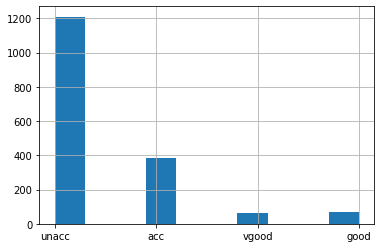

In [114]:
# Histogram of Car Acceptability

df_car['Car Acceptability'].hist();

# It seems as if very few cars are considered "Good" or "Very Good"
# This is very DisCARaging. Let's see which variables 
# might be "driving" these results...

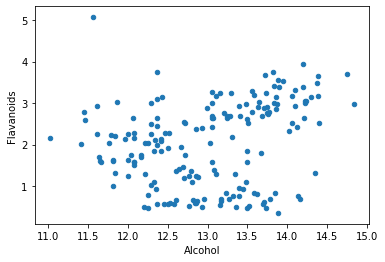

In [152]:
# Okay, I just realized that the entire dataset and that scatterplots only take
# in numerical data. Therefore, for this portion of the assignment, I am 
# going to conduct a scatterplot on the first data set (about the wine). I am
# plotting "Alcohol" on the X-axis and "Flavanoids" on the Y-axis. 

df.plot.scatter('Alcohol','Flavanoids');

# There does not appear to be a strong relationship between Alcohol and
# Flavanoids. If anything, there is a weak, but positive association between
# Alcohol and Flavanoids. 

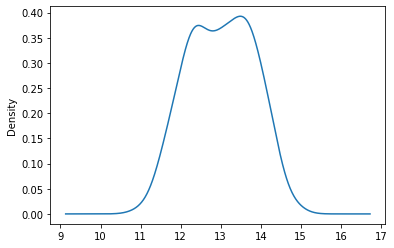

In [154]:
# Once again, I'll be doing a density plot for the Wine data set given 
# the issue with the Car data set. (only categorical data)

df['Alcohol'].plot.density();

# Appears that the median alcohol content for wine in this sample is ~13%.


## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


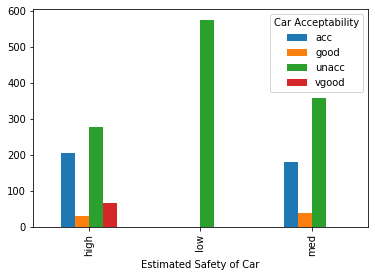

In [156]:
# Okay, so I was able to use the Car example again.
# I plotted "Estimated Safety of Car" on a bar chart
# To get a rough estimation if we can draw any quick conclusions
# About the "Saftiness" rating of a car and how that impacts
# "Car Acceptability" ratings

pd.crosstab(df_car['Estimated Safety of Car'], 
            df_car['Car Acceptability']).plot(kind='bar');

# By quickly looking at the data, we can make a few very quick conclusions:
# 1) There is not a signle car that had "Low Safety" that was rated higher
# Than "Unacceptable".

# 2) A car must have "High Safety" in ordered to be considred "Very Good"

# It's a rough approximaation, but the Car Saftiness rating appears to
# Have a strong impact on a vechicle's "Car Acceptability" rating. 

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.